# Learning from Data Week 4

Questions provided here:
https://work.caltech.edu/homework/hw4.pdf

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import fsolve
from __future__ import division

### Question 2
There are a number of bounds on the generalization error ε, all holding with probability at least 1−δ. Fix dvc = 50 and δ = 0.05 and plot these bounds as a function of N. Which bound is the smallest for very large N, say N = 10,000? Note that [c] and [d] are implicit bounds in ε.

In [68]:
# Investigate different bounds on generalization error
dvc = 50
delta = 0.05

# Original VC bound
Original_VC = lambda N: np.sqrt(8/N*(np.log(4) + dvc*np.log(2*N) - np.log(delta)))

# Rademacher Penalty bound
Rademacher = lambda N: np.sqrt(2/N*(np.log(2*N)+dvc*np.log(N))) + np.sqrt(2/N*np.log(1/delta)) + 1/N

# Parrondo and Van den Broek
def PVdB(N):
    a = 1
    b = -2/N
    c = -1/N * (np.log(6/delta) + dvc*np.log(2*N))
    return (-b + np.sqrt(np.square(b)-4*a*c))/(2*a)

# Devroye
def Devroye(N):
    a = 1-2/N
    b = -2/N
    c = -1/(2*N) * (np.log(4/delta) + 2*dvc*np.log(N))
    return (-b + np.sqrt(np.square(b)-4*a*c))/(2*a)

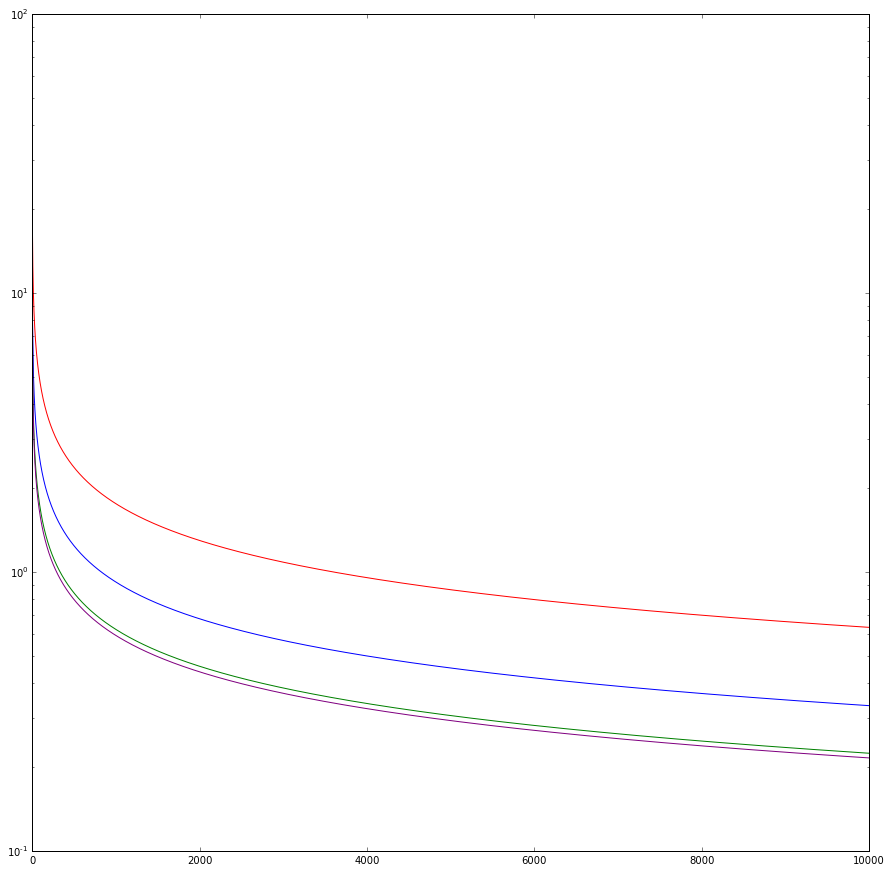

In [74]:
# Plots
N = np.arange(1,10001)
plt.figure(figsize=(15,15))
plt.plot(N, Original_VC(N), 'r-')
plt.plot(N, Rademacher(N), 'b-')
plt.plot(N, PVdB(N), 'g-')
plt.plot(N, Devroye(N), 'purple')
plt.yscale('log')

Devroye provides the smallest bound on large N

## Question 3
For the same values of dvc and δ of Problem 2, but for small N, say N = 5,
which bound is the smallest?

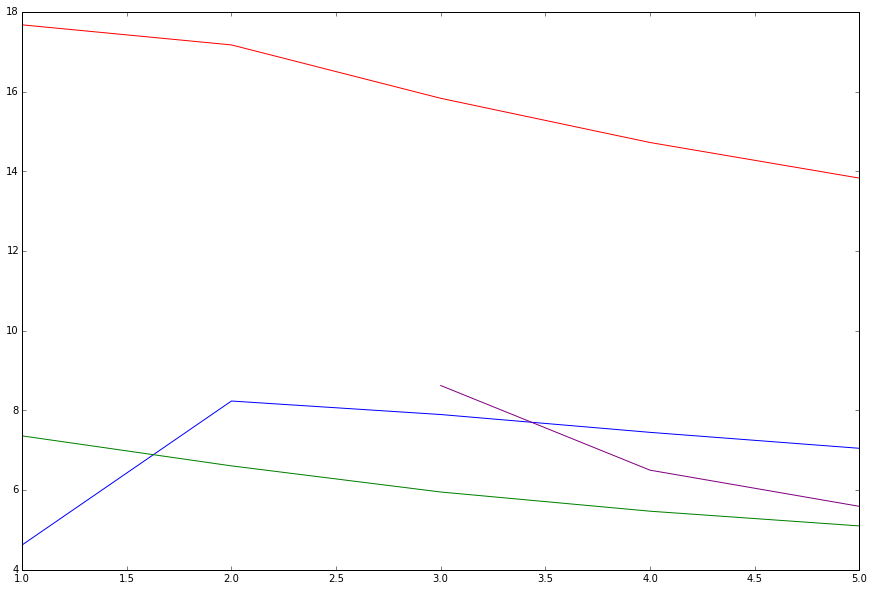

In [77]:
# Plots
N = np.arange(1,6)
plt.figure(figsize=(15,10))
plt.plot(N, Original_VC(N), 'r-')
plt.plot(N, Rademacher(N), 'b-')
plt.plot(N, PVdB(N), 'g-')
plt.plot(N, Devroye(N), 'purple')

Parrondo and Van den Broek provides the smallest bound for small N.